# Extracting from `morph.tf` all morphological categories as separate Features for the Tischendorf TF-App

Cody Kingham, MA, MA, PhD cand ([University of Cambridge](https://www.cam.ac.uk/))  has stored the morphological anylsis of the Tischendorf text (provided by Ulrik Sandborg-Petersen: https://github.com/morphgnt/tischendorf-data/)in the feature list `morph.tf`(https://github.com/codykingham/tischendorf_tf). I have (1) opened that list within excel (2) deleted the first lines containing the TF feature information and (3) stored the morphology as morph_quite-orig.xlsx ("quite-orig" because it does not contain the original TF feature information). 

This is the feature information I deleted:
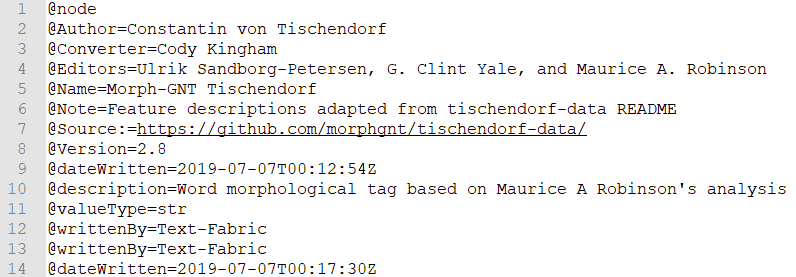

After that the following procedure was applied:
1. Identifying the different morphological features contained in the morph code by comparing the Tisch TF-app with the Tischendorf text in [Logos](https://ref.ly/logosres/tischnt?ref=BibleTISCH.Mt1). Below you find the coding for the first words of Matthew 1:1-2:
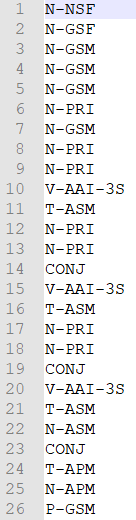

2. Extracting the different morphology features and adding them with new tagging as additional columns in the pandas df.

3. Exporting the completed df as `tischendorffeatures_v1.0.xlsx`

4. Copy pasting from the exported spreadsheet the new tf files as seperated morphological features:

    - sp (part of speech)
    - nu (number)
    - ps (person)
    - vt (verbal tense)
    - voice
    - mood
    - case
    - gn (gender)
    - nountype
    - prntyp (prnoun type)
    - originterrdiff (the original morphology distinguished between two different interrogative pronouns, that distinction is found in originterrdiff)

In [1]:
import sys, os, collections
import pandas as pd
import numpy as np
import re

# Extraction process
## Loading original `morph.tf` as df

In [2]:
featureprep=pd.read_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/Tischendorf-feature-project/morph_quite-orig.xlsx',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
featureprep.head(20)

,origorder,origcode
0,1,N-NSF
1,2,N-GSF
2,3,N-GSM
3,4,N-GSM
4,5,N-GSM
5,6,N-PRI
6,7,N-GSM
7,8,N-PRI
8,9,N-PRI
9,10,V-AAI-3S


In [3]:
featureprep.dtypes

origorder     int64
origcode     object
dtype: object

Lets change the orig columns to strings

## Adding Part of Speech

In [4]:
def spconditions(row):
    if re.search('^A.*', str(row)):
        return 'adjective'    
    if re.search('^ADV.*', str(row)):
        return 'adverb'    
    if re.search('^ARAM.*', str(row)):
        return 'aramaic-form-indeclinable'    
    if re.search('^C.*', str(row)):
        return 'pronoun'    
    if re.search('^COND.*', str(row)):
        return 'conjunction-cond'    
    if re.search('^CONJ.*', str(row)):
        return 'conjunction'      
    if re.search('^D.*', str(row)):
        return 'pronoun'       
    if re.search('^F.*', str(row)):
        return 'pronoun'      
    if re.search('^HEB.*', str(row)):
        return 'hebrew-form-indeclinable'
    if re.search('^I.*', str(row)):
        return 'pronoun'
    if re.search('^INJ.*', str(row)):
        return 'interjection'
    if re.search('^K.*', str(row)):
        return 'pronoun'
    if re.search('^N-.*', str(row)):
        return 'noun'     
    if re.search('^P-.*', str(row)):
        return 'pronoun'
    if re.search('^PREP$', str(row)):
        return 'preposition'
    if re.search('^PRT.*', str(row)):
        return 'particle'      
    if re.search('^Q.*', str(row)):
        return 'pronoun'   
    if re.search('^R.*', str(row)):
        return 'pronoun'    
    if re.search('^S.*', str(row)):
        return 'pronoun'
    if re.search('^T-.*', str(row)):
        return 'article'   
    if re.search('^V-.*', str(row)):
        return 'verb'    
    if re.search('^X.*', str(row)):
        return 'pronoun'
    else:
        return ''

In [5]:
featureprep['sp']=featureprep['origcode'].apply(spconditions)
featureprep.head(50)

,origorder,origcode,sp
0,1,N-NSF,noun
1,2,N-GSF,noun
2,3,N-GSM,noun
3,4,N-GSM,noun
4,5,N-GSM,noun
5,6,N-PRI,noun
6,7,N-GSM,noun
7,8,N-PRI,noun
8,9,N-PRI,noun
9,10,V-AAI-3S,verb


In [6]:
featureprep['sp'].value_counts()

pronoun                     33824
noun                        28404
verb                        28372
article                     19787
adjective                   12820
preposition                 10531
particle                     3815
hebrew-form-indeclinable      158
Name: sp, dtype: int64

## Adding Gender

In [7]:
def gender(row):
        if re.search('.*F$', str(row)):
            return 'f'
        if re.search('.*M$', str(row)):
            return 'm'
        if re.search('.*N$', str(row)):
            return 'n'
        else:
            return ''

In [8]:
featureprep['gn']=featureprep['origcode'].apply(gender)
featureprep.head(20)

,origorder,origcode,sp,gn
0,1,N-NSF,noun,f
1,2,N-GSF,noun,f
2,3,N-GSM,noun,m
3,4,N-GSM,noun,m
4,5,N-GSM,noun,m
5,6,N-PRI,noun,
6,7,N-GSM,noun,m
7,8,N-PRI,noun,
8,9,N-PRI,noun,
9,10,V-AAI-3S,verb,


## Adding Number

In [9]:
def number(row):
        if re.search('-.*S$', str(row)):
            return 'sg'
        if re.search('-.*S[MFN]$', str(row)):
            return 'sg'        
        if re.search('-.*P$', str(row)):
            return 'pl'
        if re.search('-.*P[MFN]$', str(row)):
            return 'pl'        
        else:
            return ''

In [10]:
featureprep['nu']=featureprep['origcode'].apply(number)
featureprep.head(50)

,origorder,origcode,sp,gn,nu
0,1,N-NSF,noun,f,sg
1,2,N-GSF,noun,f,sg
2,3,N-GSM,noun,m,sg
3,4,N-GSM,noun,m,sg
4,5,N-GSM,noun,m,sg
5,6,N-PRI,noun,,
6,7,N-GSM,noun,m,sg
7,8,N-PRI,noun,,
8,9,N-PRI,noun,,
9,10,V-AAI-3S,verb,,sg


## Adding Person

In [11]:
def person(row):
        if re.search('-.*1[SP]', str(row)):
            return 'p1'
        if re.search('-1[NGDASP]', str(row)):
            return 'p1'       
        if re.search('-.*2[SP]', str(row)):
            return 'p2'
        if re.search('-2[NGDASP]', str(row)):
            return 'p2'        
        if re.search('-.*3[SP]', str(row)):
            return 'p3'
        if re.search('-3[NGDASP]', str(row)):
            return 'p3'        
        else:
            return ''

In [12]:
featureprep['ps']=featureprep['origcode'].apply(person)
featureprep.head(20)

,origorder,origcode,sp,gn,nu,ps
0,1,N-NSF,noun,f,sg,
1,2,N-GSF,noun,f,sg,
2,3,N-GSM,noun,m,sg,
3,4,N-GSM,noun,m,sg,
4,5,N-GSM,noun,m,sg,
5,6,N-PRI,noun,,,
6,7,N-GSM,noun,m,sg,
7,8,N-PRI,noun,,,
8,9,N-PRI,noun,,,
9,10,V-AAI-3S,verb,,sg,p3


## Adding Case

In [13]:
def case(row):
        if re.search('-N[SP].*', str(row)):
            return 'nominative'
        if re.search('-[123]N[SP].*', str(row)):
            return 'nominative'        
        if re.search('-G[SP].*', str(row)):
            return 'genitive'
        if re.search('-[123]G[SP].*', str(row)):
            return 'genitive'        
        if re.search('-D[SP].*', str(row)):
            return 'dative'
        if re.search('-[123]D[SP].*', str(row)):
            return 'dative'        
        if re.search('-A[SP].*', str(row)):
            return 'accusative'
        if re.search('-[123]A[SP].*', str(row)):
            return 'accusative'        
        if re.search('-V[SP].*', str(row)):
            return 'vocative'
        if re.search('-[123]V[SP].*', str(row)):
            return 'vocative'          
        if re.search('-PRI$', str(row)):
            return 'indeclinable'
        else:
            return ''

In [14]:
featureprep['case']=featureprep['origcode'].apply(case)
featureprep.head(20)

,origorder,origcode,sp,gn,nu,ps,case
0,1,N-NSF,noun,f,sg,,nominative
1,2,N-GSF,noun,f,sg,,genitive
2,3,N-GSM,noun,m,sg,,genitive
3,4,N-GSM,noun,m,sg,,genitive
4,5,N-GSM,noun,m,sg,,genitive
5,6,N-PRI,noun,,,,indeclinable
6,7,N-GSM,noun,m,sg,,genitive
7,8,N-PRI,noun,,,,indeclinable
8,9,N-PRI,noun,,,,indeclinable
9,10,V-AAI-3S,verb,,sg,p3,


## Adding Tense

In [15]:
def tense(row):
        if re.search('V-A.*', str(row)):
            return 'aorist'
        if re.search('V-[0-9][A].*', str(row)):
            return 'aorist'        
        
        if re.search('V-P.*', str(row)):
            return 'present'
        if re.search('V-[0-9][P].*', str(row)):
            return 'present'        
        
        if re.search('V-F.*', str(row)):
            return 'future-I'
        if re.search('V-[0-9][F].*', str(row)):
            return 'future-I'        
        
        if re.search('V-I.*', str(row)):
            return 'imperfect'
        if re.search('V-[0-9][I].*', str(row)):
            return 'imperfect'        
        
        if re.search('V-L.*', str(row)):
            return 'plusquamperfect'
        if re.search('V-[0-9][L].*', str(row)):
            return 'plusquamperfect'        
        
        if re.search('V-R.*', str(row)):
            return 'perfect'
        if re.search('V-[0-9][R].*', str(row)):
            return 'perfect'        
        
        if re.search('V-T.*', str(row)):
            return 'future-II'   
        if re.search('V-[0-9][T].*', str(row)):
            return 'future-II'    
        else:
            return ''

In [16]:
featureprep['vt']=featureprep['origcode'].apply(tense)
featureprep.head(20)

,origorder,origcode,sp,gn,nu,ps,case,vt
0,1,N-NSF,noun,f,sg,,nominative,
1,2,N-GSF,noun,f,sg,,genitive,
2,3,N-GSM,noun,m,sg,,genitive,
3,4,N-GSM,noun,m,sg,,genitive,
4,5,N-GSM,noun,m,sg,,genitive,
5,6,N-PRI,noun,,,,indeclinable,
6,7,N-GSM,noun,m,sg,,genitive,
7,8,N-PRI,noun,,,,indeclinable,
8,9,N-PRI,noun,,,,indeclinable,
9,10,V-AAI-3S,verb,,sg,p3,,aorist


## Adding Voice

In [17]:
def voice(row):
        if re.search('V-[A-Z][A].*', str(row)):
            return 'active'
        if re.search('V-[A-Z][O].*', str(row)):
            return 'passive'        
        if re.search('V-[A-Z][P].*', str(row)):
            return 'passive'
        if re.search('V-[A-Z][D].*', str(row)):
            return 'medium' 
        if re.search('V-[A-Z][N].*', str(row)):
            return 'mediumorpassive' 
        else:
            return ''

In [18]:
featureprep['voice']=featureprep['origcode'].apply(voice)
featureprep.head(20)

,origorder,origcode,sp,gn,nu,ps,case,vt,voice
0,1,N-NSF,noun,f,sg,,nominative,,
1,2,N-GSF,noun,f,sg,,genitive,,
2,3,N-GSM,noun,m,sg,,genitive,,
3,4,N-GSM,noun,m,sg,,genitive,,
4,5,N-GSM,noun,m,sg,,genitive,,
5,6,N-PRI,noun,,,,indeclinable,,
6,7,N-GSM,noun,m,sg,,genitive,,
7,8,N-PRI,noun,,,,indeclinable,,
8,9,N-PRI,noun,,,,indeclinable,,
9,10,V-AAI-3S,verb,,sg,p3,,aorist,active


## Adding Mood

In [19]:
def mood(row):
        if re.search('V-[A-Z][A-Z][I].*', str(row)):
            return 'indicative'
        if re.search('V-[0-9][A-Z][A-Z][I].*', str(row)):
            return 'indicative'        
        
        if re.search('V-[A-Z][A-Z][M].*', str(row)):
            return 'imperative'
        if re.search('V-[0-9][A-Z][A-Z][M].*', str(row)):
            return 'imperative'        
        
        if re.search('V-[A-Z][A-Z][N].*', str(row)):
            return 'infinitive'
        if re.search('V-[0-9][A-Z][A-Z][N].*', str(row)):
            return 'infinitive'        
        
        if re.search('V-[A-Z][A-Z][O].*', str(row)):
            return 'optative' 
        if re.search('V-[0-9][A-Z][A-Z][O].*', str(row)):
            return 'optative'         
        
        if re.search('V-[A-Z][A-Z][P].*', str(row)):
            return 'participle'
        if re.search('V-[0-9][A-Z][A-Z][P].*', str(row)):
            return 'participle'        
        
        if re.search('V-[A-Z][A-Z][S].*', str(row)):
            return 'subjunctive'   
        if re.search('V-[0-9][A-Z][A-Z][S].*', str(row)):
            return 'subjunctive'   
        else:
            return ''

In [20]:
featureprep['mood']=featureprep['origcode'].apply(mood)
featureprep.head(50)

,origorder,origcode,sp,gn,nu,ps,case,vt,voice,mood
0,1,N-NSF,noun,f,sg,,nominative,,,
1,2,N-GSF,noun,f,sg,,genitive,,,
2,3,N-GSM,noun,m,sg,,genitive,,,
3,4,N-GSM,noun,m,sg,,genitive,,,
4,5,N-GSM,noun,m,sg,,genitive,,,
5,6,N-PRI,noun,,,,indeclinable,,,
6,7,N-GSM,noun,m,sg,,genitive,,,
7,8,N-PRI,noun,,,,indeclinable,,,
8,9,N-PRI,noun,,,,indeclinable,,,
9,10,V-AAI-3S,verb,,sg,p3,,aorist,active,indicative


## Adding Pronoun type

In [21]:
def pronountype(row):
    if re.search('^P-', str(row)):
        return 'pers'
    if re.search('^D-', str(row)):
        return 'demo'
    if re.search('^I-', str(row)):
        return 'interr'
    if re.search('^X-', str(row)):
        return 'indef'
    if re.search('^F-', str(row)):
        return 'reflex'
    if re.search('^K-', str(row)):
        return 'correl'
    if re.search('^R-', str(row)):
        return 'relativ'    
    if re.search('^S-', str(row)):
        return 'posses'
    if re.search('^C-', str(row)):
        return 'recip'
    if re.search('^Q-', str(row)):
        return 'interr'
    else:
        return ''

In [22]:
featureprep['prntyp']=featureprep['origcode'].apply(pronountype)
featureprep.head(50)

,origorder,origcode,sp,gn,nu,ps,case,vt,voice,mood,prntyp
0,1,N-NSF,noun,f,sg,,nominative,,,,
1,2,N-GSF,noun,f,sg,,genitive,,,,
2,3,N-GSM,noun,m,sg,,genitive,,,,
3,4,N-GSM,noun,m,sg,,genitive,,,,
4,5,N-GSM,noun,m,sg,,genitive,,,,
5,6,N-PRI,noun,,,,indeclinable,,,,
6,7,N-GSM,noun,m,sg,,genitive,,,,
7,8,N-PRI,noun,,,,indeclinable,,,,
8,9,N-PRI,noun,,,,indeclinable,,,,
9,10,V-AAI-3S,verb,,sg,p3,,aorist,active,indicative,


## Adding Noun Type

In [23]:
def propernoun(row):
        if re.search('-PRI$', str(row)):
            return 'nmpr'
        else:
            return ''

In [24]:
featureprep['nountype']=featureprep['origcode'].apply(propernoun)
featureprep.head(50)

,origorder,origcode,sp,gn,nu,ps,case,vt,voice,mood,prntyp,nountype
0,1,N-NSF,noun,f,sg,,nominative,,,,,
1,2,N-GSF,noun,f,sg,,genitive,,,,,
2,3,N-GSM,noun,m,sg,,genitive,,,,,
3,4,N-GSM,noun,m,sg,,genitive,,,,,
4,5,N-GSM,noun,m,sg,,genitive,,,,,
5,6,N-PRI,noun,,,,indeclinable,,,,,nmpr
6,7,N-GSM,noun,m,sg,,genitive,,,,,
7,8,N-PRI,noun,,,,indeclinable,,,,,nmpr
8,9,N-PRI,noun,,,,indeclinable,,,,,nmpr
9,10,V-AAI-3S,verb,,sg,p3,,aorist,active,indicative,,


## Adding Orig Interrogative differential

In [25]:
def originterrdiff(row):
    if re.search('^I.*', str(row)):
        return 'I'
    if re.search('^Q.*', str(row)):
        return 'Q'
    else:
        return ''

In [26]:
featureprep['originterrdiff']=featureprep['origcode'].apply(originterrdiff)
featureprep['originterrdiff'].value_counts()

     137057
I       627
Q        27
Name: originterrdiff, dtype: int64

# Exporting proces

In [27]:
featureprep.head()

,origorder,origcode,sp,gn,nu,ps,case,vt,voice,mood,prntyp,nountype,originterrdiff
0,1,N-NSF,noun,f,sg,,nominative,,,,,,
1,2,N-GSF,noun,f,sg,,genitive,,,,,,
2,3,N-GSM,noun,m,sg,,genitive,,,,,,
3,4,N-GSM,noun,m,sg,,genitive,,,,,,
4,5,N-GSM,noun,m,sg,,genitive,,,,,,


## reorder
sorting first...

In [28]:
featureprep.sort_values(['origorder'], ascending=True).head(10)

,origorder,origcode,sp,gn,nu,ps,case,vt,voice,mood,prntyp,nountype,originterrdiff
0,1,N-NSF,noun,f,sg,,nominative,,,,,,
1,2,N-GSF,noun,f,sg,,genitive,,,,,,
2,3,N-GSM,noun,m,sg,,genitive,,,,,,
3,4,N-GSM,noun,m,sg,,genitive,,,,,,
4,5,N-GSM,noun,m,sg,,genitive,,,,,,
5,6,N-PRI,noun,,,,indeclinable,,,,,nmpr,
6,7,N-GSM,noun,m,sg,,genitive,,,,,,
7,8,N-PRI,noun,,,,indeclinable,,,,,nmpr,
8,9,N-PRI,noun,,,,indeclinable,,,,,nmpr,
9,10,V-AAI-3S,verb,,sg,p3,,aorist,active,indicative,,,


## to excel spreadsheet...

In [29]:
featureprep.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/Tischendorf-feature-project/tischendorffeatures_v1.0.xlsx')

# Misc

Features to txt files...

In [30]:
# tischendorffeatures[['origorder', 'nu']].to_csv('d:/OneDrive/1200_AUS-research/Fabric-TEXT/Tischendorf-feature-project/TF_features_gn.csv')